<a href="https://colab.research.google.com/github/SaharaSheik/Machine-Learning---Linear-Model/blob/main/Sheikholeslami_Sahar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This jupyter notebook is prepared by “Sahar Sheikholeslami”.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Load Data and perform general EDA 

### I) import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from sklearn import tree, ensemble, linear_model


### II) import the data to a dataframe and show the count of rows and columns (1 pt)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ecommarce.csv")
df.shape

(500, 9)

### III) Show the top 5 and last 5 rows (1 pt)

In [ ]:
df.head(5)

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,adkv@ota.com,"89280 Mark Lane\nNew John, MN 16131",3544288738428794,35.497268,13.655651,40.577668,4.582621,588.951054
1,1,gjun@syj.com,"363 Amanda Cliff Apt. 638\nWest Angela, KS 31437",6546228325389133,32.926272,12.109461,38.268959,3.164034,393.204933
2,2,qjyr@pkk.com,"62008 Adam Lodge\nLake Pamela, NY 30677",4406395951712628314,34.000915,12.330278,38.110597,4.604543,488.547505
3,3,jkiu@xsb.com,"950 Tami Island\nLake Aimeeview, MT 93614",30334036663133,35.305557,14.717514,37.721283,3.620179,582.852344
4,4,stvb@niy.com,"08254 Kelly Squares\nNorth Lauren, AR 78382",3582080469154498,34.330673,13.795189,38.536653,4.946308,600.406092


In [ ]:
df.tail(5)

,Unnamed: 0,Email,Address,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,495,xskz@gwj.com,"7083 Wallace Rest\nNew Trevor, NM 70240",30206742023085,34.237660,14.566160,37.417985,4.246573,574.847438
496,496,awrc@iok.com,"663 Christopher Garden\nLake Carrieberg, PA 70796",6011536844623717,35.702529,12.695736,38.190268,4.076526,530.049004
497,497,pndt@jyr.com,"1555 Chen Road\nBergerchester, NH 46418",4086276267550896697,33.646777,12.499409,39.332576,5.458264,552.620145
498,498,zvtz@onj.com,"5568 Robert Station Apt. 030\nTurnerstad, GA 9...",36218092488069,34.322501,13.391423,37.840086,2.836485,457.469510
499,499,phqb@nlg.com,"424 Mark Junctions\nDarrellchester, TX 09088",5427200269739116,34.715981,13.418808,36.771016,3.235160,498.778642


### IV)  call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)

In [ ]:
df.describe()

,Unnamed: 0,Credit Card,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,3.706324e+17,34.053194,13.052488,38.060445,4.033462,500.314038
std,144.481833,1.235588e+18,0.992563,0.994216,1.010489,0.999278,79.314782
min,0.000000,5.018057e+11,30.532429,9.508152,34.913847,0.769901,257.670582
25%,124.750000,3.683275e+13,33.341822,12.388153,37.349257,3.430450,446.038277
50%,249.500000,3.513612e+15,34.082008,12.983231,38.069367,4.033975,499.887875
75%,374.250000,4.777131e+15,34.711985,13.753850,38.716432,4.626502,550.313828
max,499.000000,4.959148e+18,37.139662,16.126994,41.005182,7.422689,766.518462


#### 1. Explain in words about the description of any two variables (1 pt)

#### a) Time on App: There are 500 instances.  The mean time spent on the app is 13.052 mins.  The std is 1.010 which means data is fairly uniform around the mean. This can be 25%, 50% & 75% are all fairly close to the mean of 13.05. 

#### b) Yearly Amount Spent: This variable seems to be fairly varries.  std is 70.31 which shows there is a good variance betweens datas.  This can be observed the min amount spent at 257 and the max at 766 vary drastically from one another and they are fairly distant from the mean of 500.  However these data seem to be more of outliers becayse the 25%, 50% and 75% percentiles are fairly close to the median.  An indicator that we perhaps do not have as many of these hugely lower and higher numbers 


### V) Show any missing value analysis  (1 pt)

#### there seens to be no missing data.  I included a few strategies here to show that there are no missing datas.  Incase the question refers to us demonstrating differnt ways of analyzing missing data

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Unnamed: 0              0
Email                   0
Address                 0
Credit Card             0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
nulls = df.isnull().sum()
nulls = nulls.to_frame("nulls").sort_values("nulls", ascending = False)
print(nulls)

                      nulls
Unnamed: 0                0
Email                     0
Address                   0
Credit Card               0
Avg. Session Length       0
Time on App               0
Time on Website           0
Length of Membership      0
Yearly Amount Spent       0


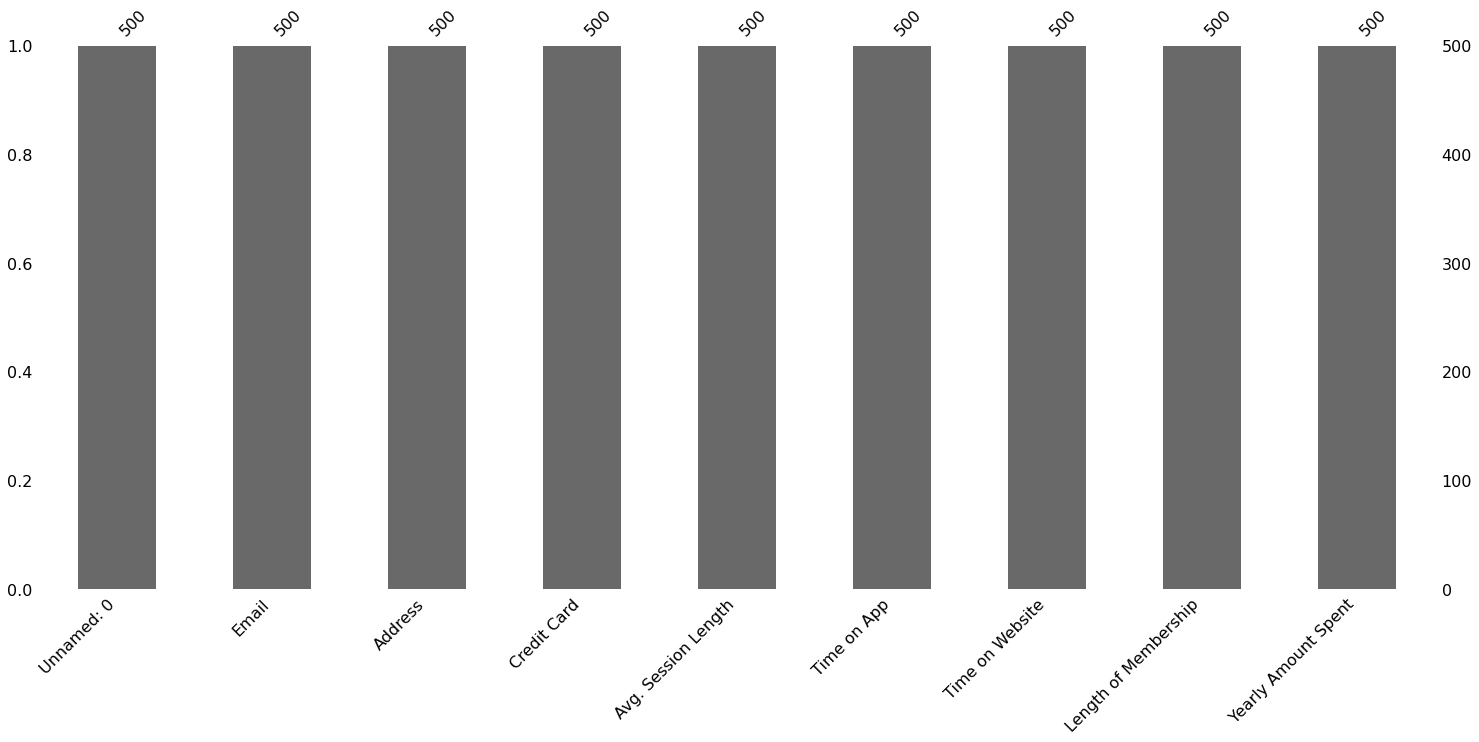

In [ ]:
msno.bar(df)

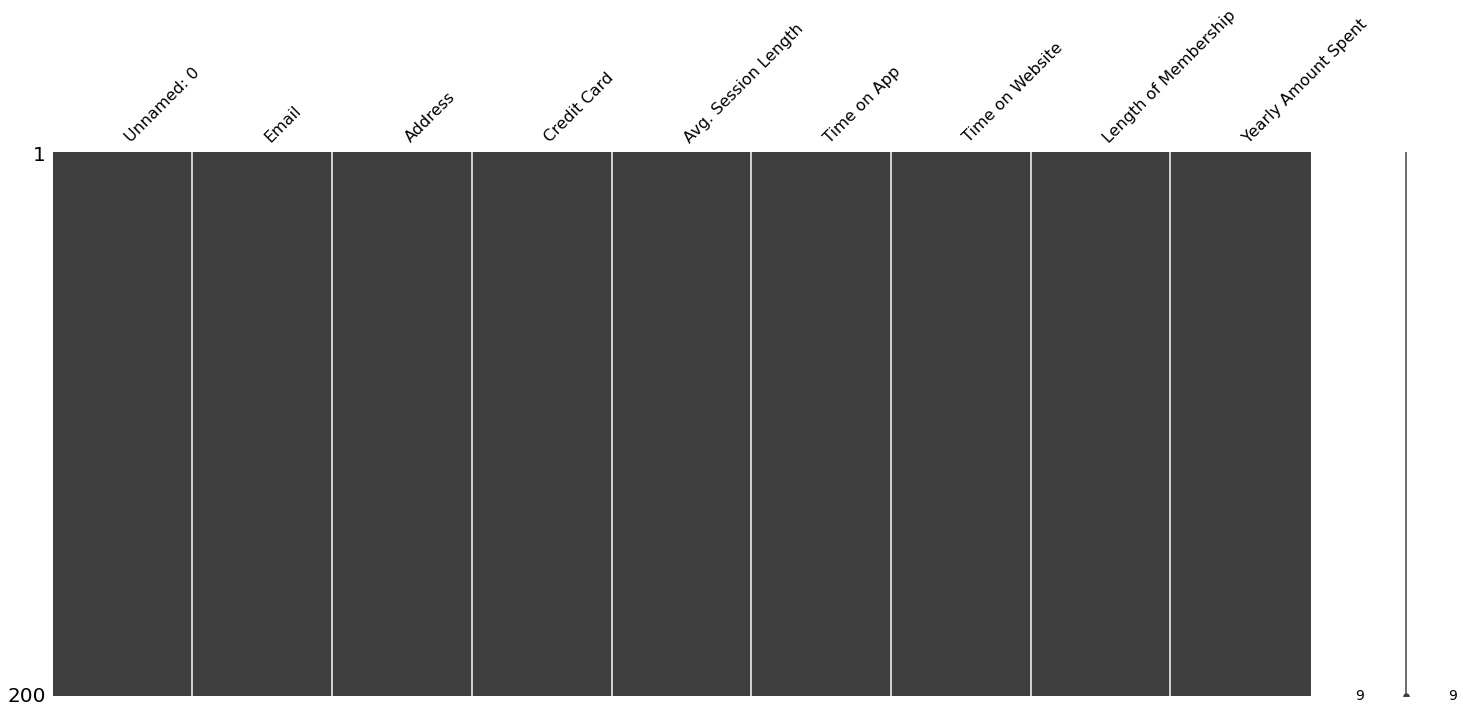

In [ ]:
msno.matrix(df.sample(200))

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


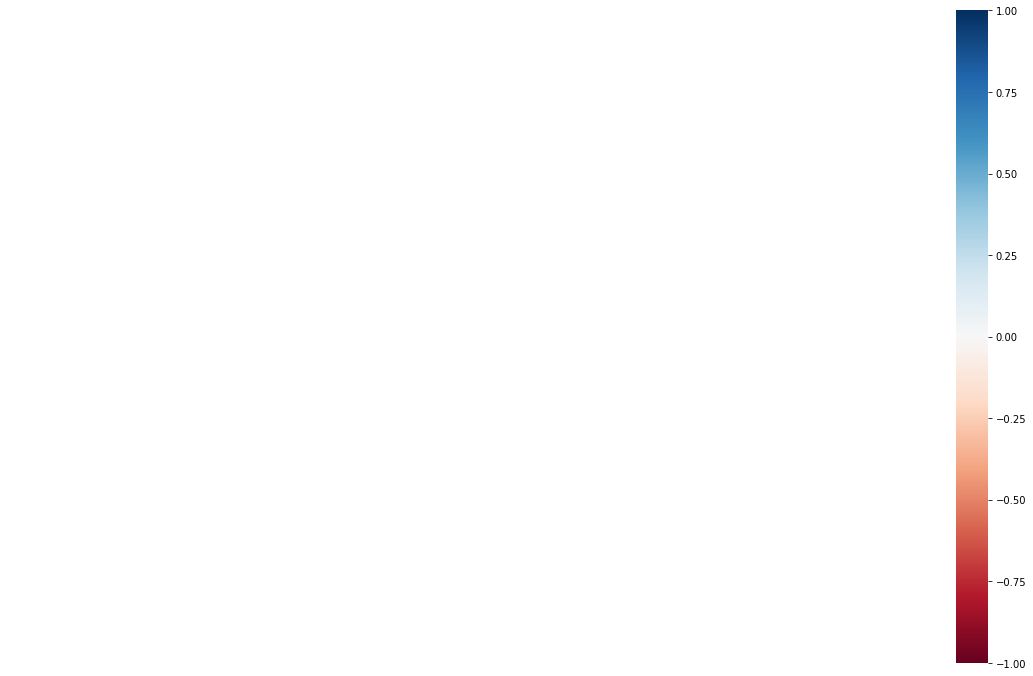

In [ ]:
msno.heatmap(df)

### VI. Plot various scatter plots to understand the data:

#### I. Yearly amount Spent vs Time on Website

##### Note: I did it with both sns.scatterplot and plt.scatter

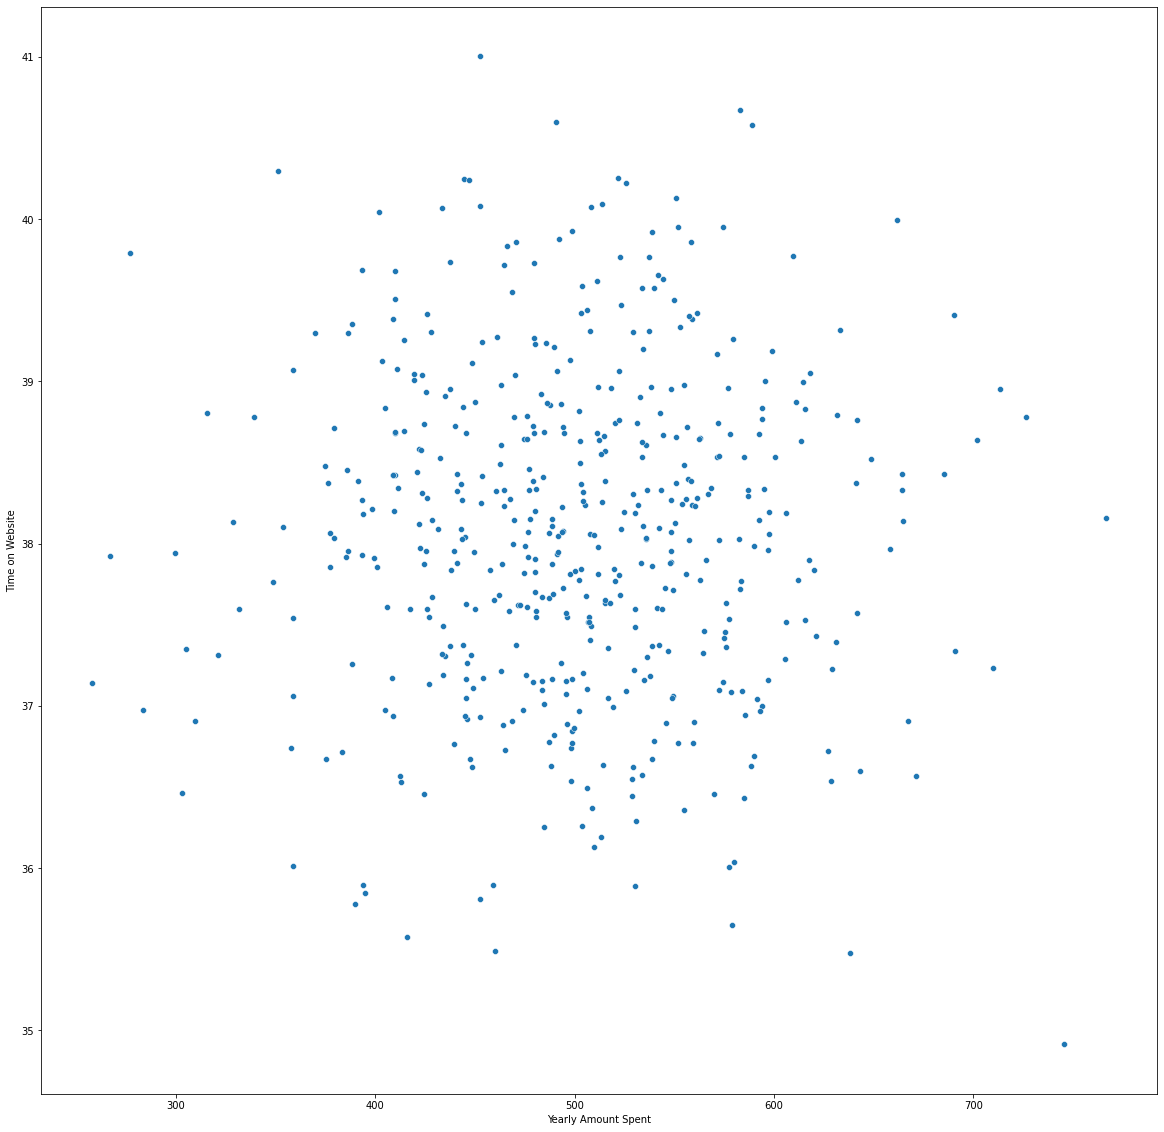

In [ ]:
plt.figure(figsize = (20,20))
sns.scatterplot(x = "Yearly Amount Spent", y = "Time on Website", data = df)

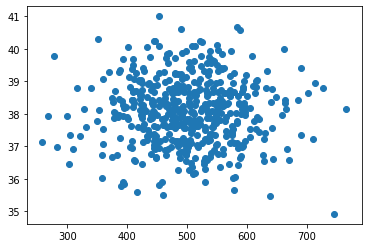

<Figure size 1440x1440 with 0 Axes>

In [ ]:
x = df['Yearly Amount Spent']
y = df["Time on Website"]
plt.scatter(x, y)
plt.figure(figsize = (20,20))
plt.show()

#### II. Yearly amount Spent vs Time on App 

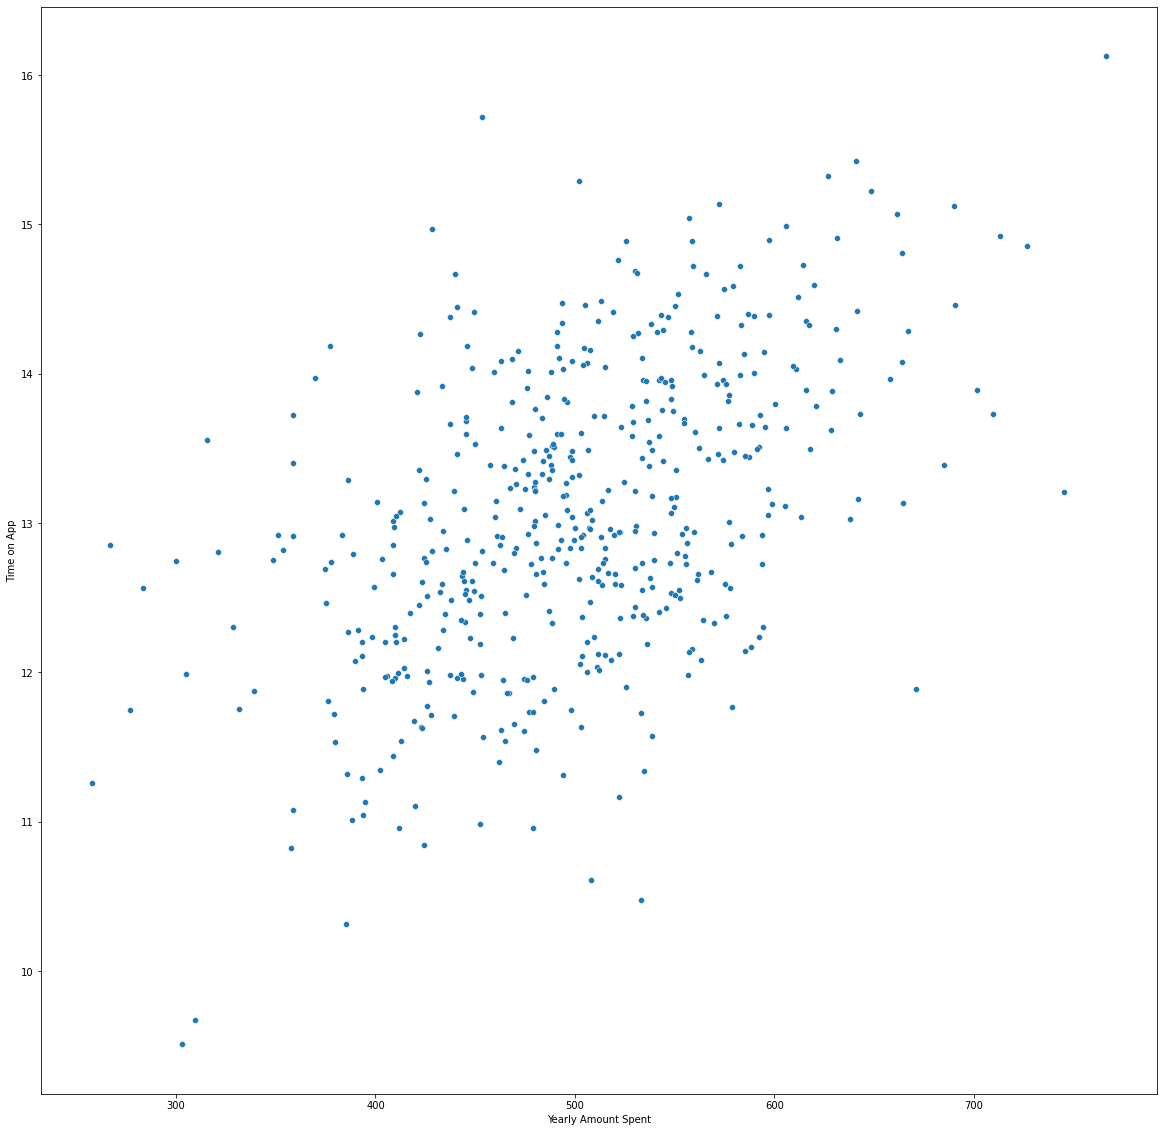

In [ ]:
plt.figure(figsize = (20,20))
sns.scatterplot(x = "Yearly Amount Spent", y = "Time on App", data = df)

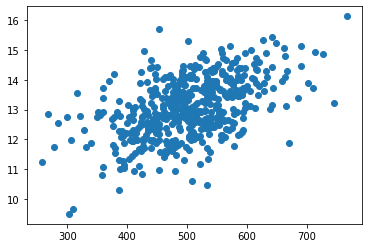

<Figure size 1440x1440 with 0 Axes>

In [ ]:
x = df['Yearly Amount Spent']
y = df["Time on App"]
plt.scatter(x, y)
plt.figure(figsize = (20,20))
plt.show()


#### III. Length of membership vs Time on App

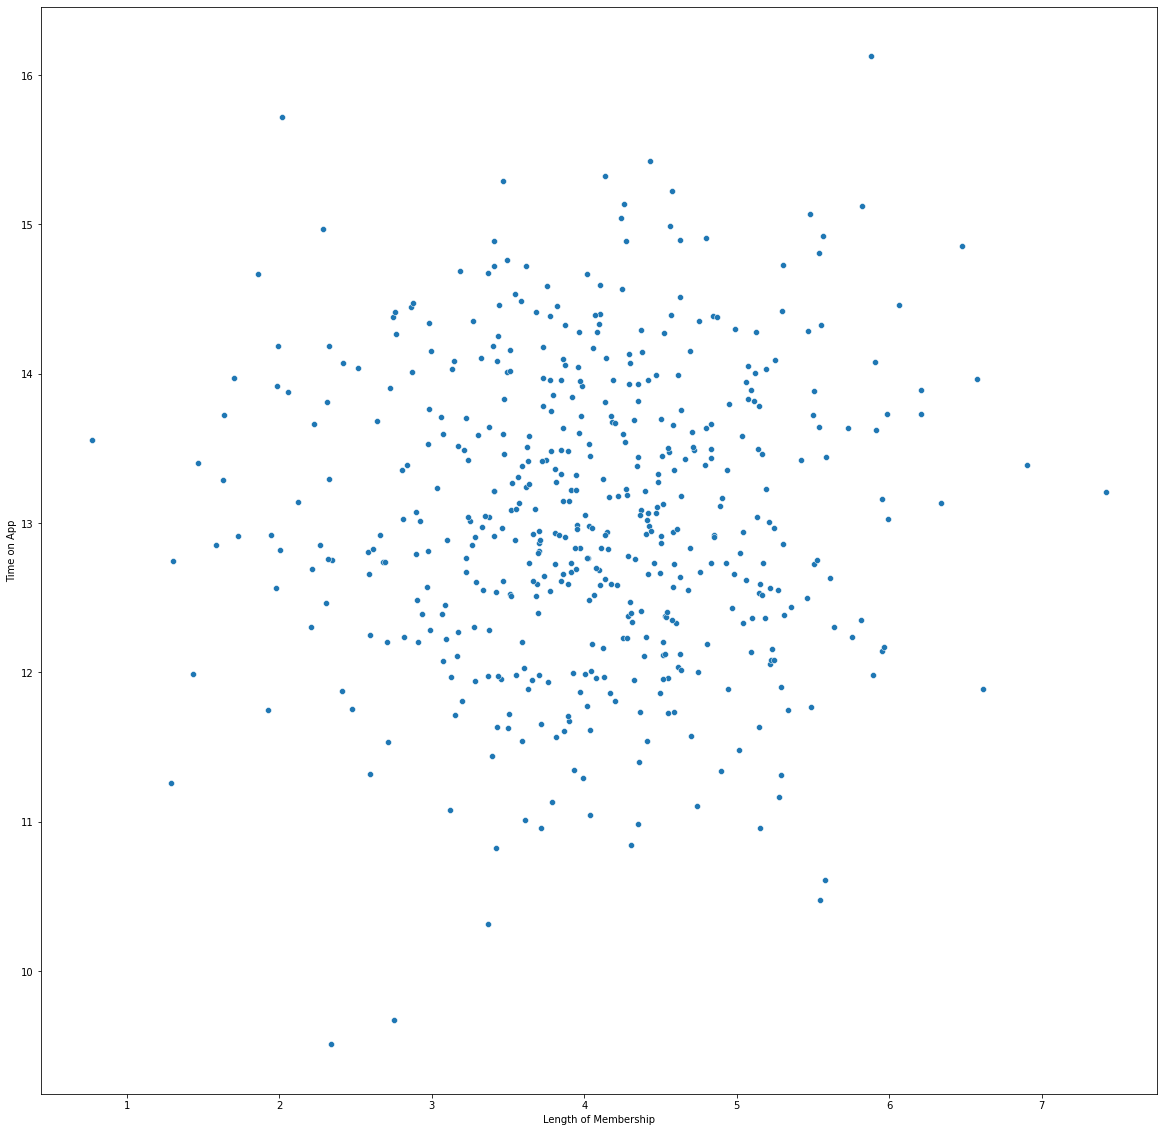

In [ ]:
plt.figure(figsize = (20, 20))
sns.scatterplot(x ="Length of Membership" , y ="Time on App" , data= df)

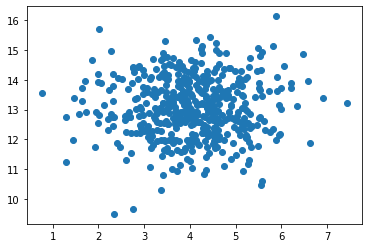

<Figure size 1440x1440 with 0 Axes>

In [ ]:
x = df['Length of Membership']
y = df['Time on App']
plt.scatter(x, y)
plt.figure(figsize = (20, 20))
plt.show()

#### IV. Generate sns pairplot. Based on the plots, what feature is mostly correlated with the yearly amount spent?

##### Answer: based on the below pairplot lenghth of membership and yearly spent amount are most correlated

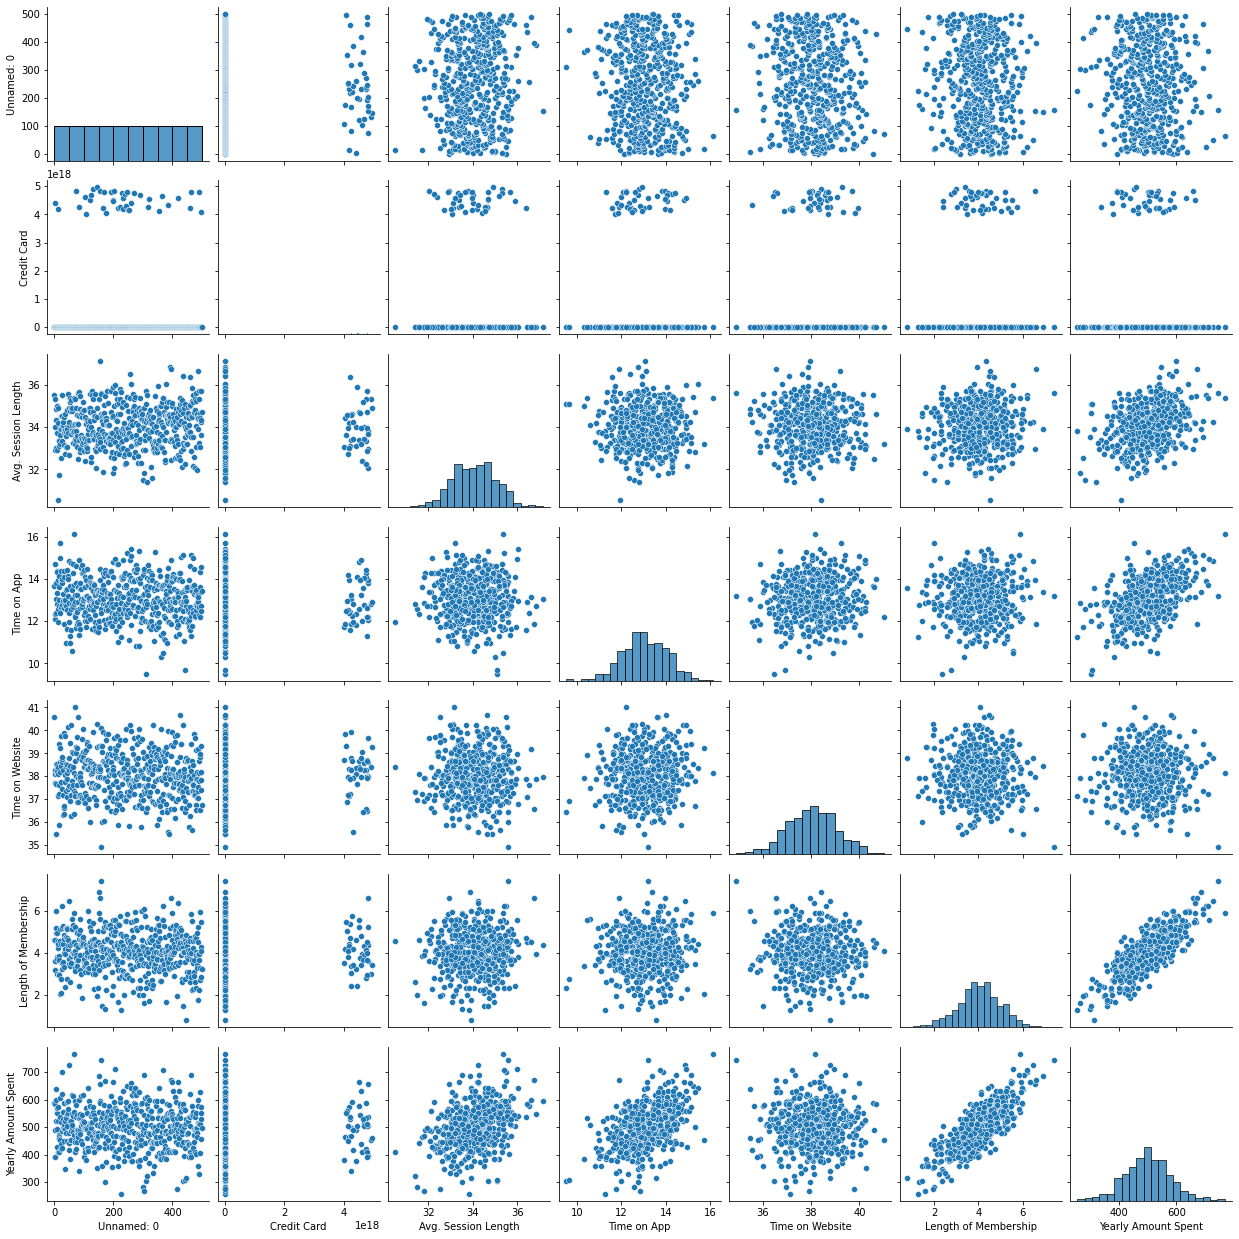

In [ ]:
sns.pairplot(df)

#### V. Also, plot sns heatmpa based on correlation with annot=True and discuss which columns must be removed based on that and which column is mostly interesting and related to Yearly Amount Spent?

##### Answer: column Unnamed, Credit Card, Time On Website are highly un-related to yearly amount spent so they can be removed.  Lenghth of  memebership is highly related to spend amount.  Also time on App  as a good correlation with amount spent.  I thought it was interesting that time on website did not translate into spending but time on app was so related.  Shows customers make their purchses mainly while they are on app.  And the more time they spent per session the more likey they will purchase.  As the amount spent is also correlated with the Ave.Session Lenghth

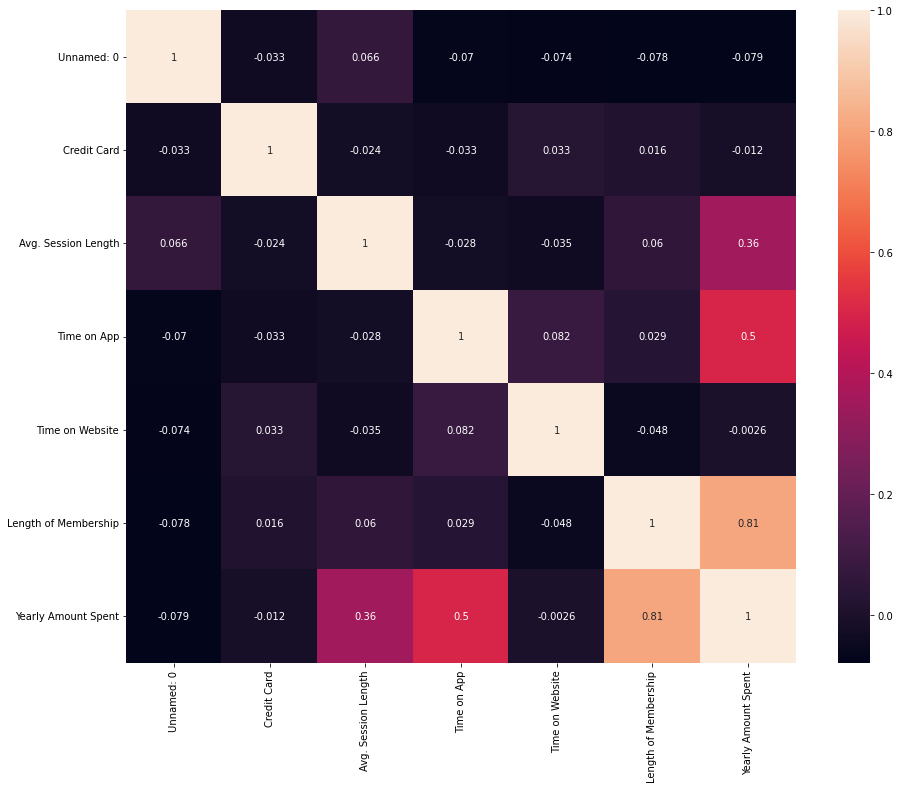

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(),annot=True  )

#### VI. Generate a scatter plot with the interesting column you found in the last step against the Yearly Amount Spent 

##### Answer. I think time on App is interesting.  Of course lenghth of memebership is also interesting but that was discovered during the last pairplot.  Also Ave Session Lenghth is interesting.  

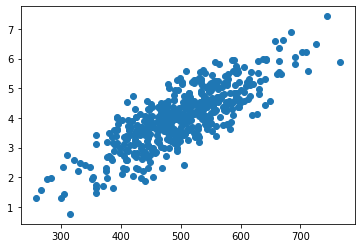

<Figure size 1440x1440 with 0 Axes>

In [ ]:
x = df['Yearly Amount Spent']
y = df['Length of Membership']
plt.scatter(x, y)
plt.figure(figsize = (20, 20))
plt.show()

<function matplotlib.pyplot.show>

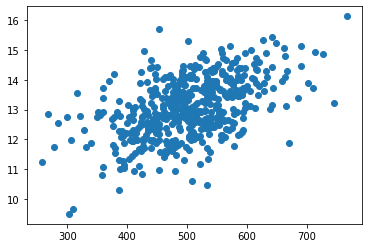

<Figure size 1440x2160 with 0 Axes>

In [ ]:
x = df['Yearly Amount Spent']
y = df['Time on App']
plt.scatter(x,y)
plt.figure(figsize= (20,30))
plt.show

<function matplotlib.pyplot.show>

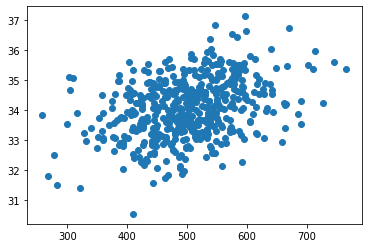

<Figure size 1440x2160 with 0 Axes>

In [ ]:
x = df['Yearly Amount Spent']
y = df['Avg. Session Length']
plt.scatter(x,y)
plt.figure(figsize = (20,30))
plt.show

## 2.   Feature Selection and Pre-processing

### I.Based on the EDA and null analysis, drop the unnecessary columns for the regression

In [ ]:
new_df = df.drop(["Unnamed: 0", 'Time on Website', 'Credit Card', 'Email', 'Address'], axis=1)


new_df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,35.497268,13.655651,4.582621,588.951054
1,32.926272,12.109461,3.164034,393.204933
2,34.000915,12.330278,4.604543,488.547505
3,35.305557,14.717514,3.620179,582.852344
4,34.330673,13.795189,4.946308,600.406092


## 3.X/Y and Training/Test Split

### I. Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 101 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = new_df ['Yearly Amount Spent'] 
X = new_df.drop('Yearly Amount Spent', axis=1)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 101 )
print(X_train)

     Avg. Session Length  Time on App  Length of Membership
202            32.525752    12.340036              4.311248
428            32.862741    15.039867              4.238225
392            34.258238    12.514949              5.162845
86             34.877779    13.517666              3.169942
443            34.025020    13.504220              4.551382
..                   ...          ...                   ...
63             33.789773    12.670066              3.914688
326            34.217188    11.999684              4.743813
337            32.827979    13.461147              3.474737
11             34.879361    12.584783              4.213209
351            33.189845    12.386776              5.308320

[350 rows x 3 columns]


### II. As we will be doing gradient descent as well as some other regression technique, scaling the data set is important. So, use sklearn's StandardScaler for scalling the X of training and test sets. But don't do it for y(target) train and test. [For help, you can see the answer for this question: Link 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Training Linear Model using SKLearn's LinearRegression 

### I.Train a linear model using Sklearn''s LinearRegression (example in the linear regression slide/colab links in webcourses)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### II. After training, show the coefficients and intercept

In [ ]:
print(lr.coef_, lr.intercept_)

[26.04870628 36.69255503 60.19248611] 499.7231164913073


### III. Predict for the test data

In [ ]:
y_predict = lr.predict(X_test_scaled)

### IV. Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis

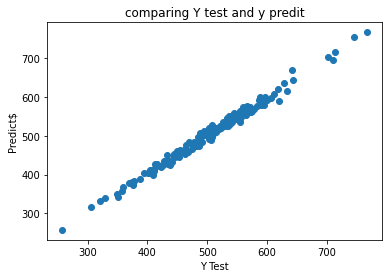

In [ ]:
plt.scatter(x=y_test, y=y_predict)

plt.xlabel("Y Test")
plt.ylabel("Predict$")
plt.title("comparing Y test and y predit")
plt.show()

### V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
import sklearn.metrics as metrics 
MAE = metrics.mean_absolute_error(y_test, y_predict )
MSE = metrics.mean_squared_error(y_test, y_predict )
RMSE = np.sqrt(MSE)  
r2 = metrics.r2_score(y_test,y_predict )


print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.236949056091403
MSE: 80.19544609397664
RMSE: 8.955191013818558
R^2: 0.9889519444377916


### VI. Interpretation: Interpret the coefficient and which coefficient belongs to which feature and based on that explain any strategy that should help the business

#### Answer: The features we had were Avg. Session Length,	Time on App,	Length of Membership, the coefficients were respectively[26.04870628 36.69255503 60.19248611] .  This means Aveg session time has a smaller effect on purchase amount, than the Time on App and The time on App has less of a weight on purchase amount than length of memebership. We also have a highly  intercept of 499.7231164913073.  So at an instance where all the variables are zero (Avg. Session Length,	Time on App,	Length of Membership) the cost of the customer before it converts to spending is 499.   So the business will need to concentrate most of its effort on retining longer memership length.  Maybe by offering better customer service, better customer experince,...  Next they need to concentrate on the amont of time customers spent on their App. Making the app more interactive, easier to work with, maybe offer promotions for the customer to stay more time on the App. Special promotion for App purchases,... lastly they need to concentrae on Session lenghth. Making the interface such that customer is less likely to leave.  Maybe offer a final discounts,.. at last moment before customer leaves.  Maybe offer promotions for customers to leave reviews,.. just to extend their session lenghth.

## 5. Normal Equation (while solving this, you might need to convert your dataframe into various different data structures such as to_numpy(), might need to reshape, perform Transpose, add x0 columns, etc. I would recommend you to see the colab link I have shown you in the class and try to compare the shape of x and y and their data to get an idea during this process. Also, the code and discussion in the slide will help.

### I. Implement Normal Equation and find best_theta values based on the training set

In [ ]:
X_train_scaled.shape

(350, 3)

In [ ]:
y_train.shape

(350,)

In [ ]:
#conver y to numpy array so we can perform operation on it 

y_train_reshape = y_train.to_numpy()
y_train_reshape


array([444.96562681, 557.29814117, 550.13157329, 488.37930602,
       562.51653198, 538.8252823 , 445.58216498, 543.41247673,
       550.00822693, 440.07476674, 433.72071784, 511.5394217 ,
       627.01867266, 577.8025474 , 428.1993849 , 533.71748568,
       425.67528101, 487.94705384, 538.91575292, 531.36246889,
       393.81034498, 458.84769594, 453.12262509, 531.76671865,
       502.87443028, 582.79879768, 539.94197453, 479.2621264 ,
       559.42725718, 507.42385997, 474.36049557, 512.03878605,
       502.74923331, 568.47501053, 611.12803313, 443.72289157,
       550.86059046, 658.01992394, 445.96655165, 447.41867337,
       425.18549429, 425.76263551, 509.77190674, 450.07031944,
       542.04983096, 690.23569976, 489.78606109, 469.91350132,
       515.33655827, 579.98625858, 586.9318443 , 558.52927361,
       424.47053317, 433.47206125, 617.85152297, 513.55253436,
       421.91615953, 448.18764431, 408.80403064, 593.6884532 ,
       386.15233799, 495.68715581, 421.73767324, 480.17

In [ ]:
#reshape y_train from 1D to 2D
y_train_reshape.reshape(350,1)

array([[444.96562681],
       [557.29814117],
       [550.13157329],
       [488.37930602],
       [562.51653198],
       [538.8252823 ],
       [445.58216498],
       [543.41247673],
       [550.00822693],
       [440.07476674],
       [433.72071784],
       [511.5394217 ],
       [627.01867266],
       [577.8025474 ],
       [428.1993849 ],
       [533.71748568],
       [425.67528101],
       [487.94705384],
       [538.91575292],
       [531.36246889],
       [393.81034498],
       [458.84769594],
       [453.12262509],
       [531.76671865],
       [502.87443028],
       [582.79879768],
       [539.94197453],
       [479.2621264 ],
       [559.42725718],
       [507.42385997],
       [474.36049557],
       [512.03878605],
       [502.74923331],
       [568.47501053],
       [611.12803313],
       [443.72289157],
       [550.86059046],
       [658.01992394],
       [445.96655165],
       [447.41867337],
       [425.18549429],
       [425.76263551],
       [509.77190674],
       [450

In [ ]:
y_train_reshape.reshape(350,1)

array([[444.96562681],
       [557.29814117],
       [550.13157329],
       [488.37930602],
       [562.51653198],
       [538.8252823 ],
       [445.58216498],
       [543.41247673],
       [550.00822693],
       [440.07476674],
       [433.72071784],
       [511.5394217 ],
       [627.01867266],
       [577.8025474 ],
       [428.1993849 ],
       [533.71748568],
       [425.67528101],
       [487.94705384],
       [538.91575292],
       [531.36246889],
       [393.81034498],
       [458.84769594],
       [453.12262509],
       [531.76671865],
       [502.87443028],
       [582.79879768],
       [539.94197453],
       [479.2621264 ],
       [559.42725718],
       [507.42385997],
       [474.36049557],
       [512.03878605],
       [502.74923331],
       [568.47501053],
       [611.12803313],
       [443.72289157],
       [550.86059046],
       [658.01992394],
       [445.96655165],
       [447.41867337],
       [425.18549429],
       [425.76263551],
       [509.77190674],
       [450

In [ ]:
# add 1s to each instance of x

X_mod = np.c_[np.ones(len(X_train_scaled)), X_train_scaled]
X_mod

array([[ 1.        , -1.49994106, -0.7308338 ,  0.27443007],
       [ 1.        , -1.16374302,  2.11003957,  0.20010103],
       [ 1.        ,  0.22847958, -0.54678302,  1.14125825],
       ...,
       [ 1.        , -1.19842351,  0.44884576, -0.57704253],
       [ 1.        ,  0.84814529, -0.47330089,  0.17463764],
       [ 1.        , -0.83740685, -0.68165245,  1.28933518]])

In [ ]:
X_mod.shape


(350, 4)

In [ ]:


best_theta =np.linalg.inv(X_mod.T.dot(X_mod)).dot(X_mod.T).dot(y_train_reshape)
print("best theta is: \n", best_theta) 

best theta is: 
 [499.72311649  26.04870628  36.69255503  60.19248611]


### II.Display the theta values. Are they very close to the sklearn's linear regression?

In [ ]:
print("best theta is: \n", best_theta)

best theta is: 
 [499.72311649  26.04870628  36.69255503  60.19248611]


#### Answer: linear regression thetas were as follow:  [26.04870628 36.69255503 60.19248611] 499.7231164913073.  So the values of best theta using the normal equation and regression model The are very very close to each other

### III. Prepare the test set before prediction

In [ ]:
#prep y_test
y_test_reshape = y_test.to_numpy()
y_test_reshape.reshape(len(y_test), 1)


array([[453.31567548],
       [402.03313522],
       [411.06961106],
       [600.40609205],
       [587.15587018],
       [536.48077519],
       [589.71260551],
       [713.39632681],
       [463.89763615],
       [533.72480546],
       [328.37795259],
       [493.5568337 ],
       [544.34016626],
       [404.7669021 ],
       [766.51846194],
       [538.84619527],
       [709.93518487],
       [502.92826487],
       [565.79096901],
       [572.21600483],
       [409.64035107],
       [549.51852928],
       [468.4278485 ],
       [491.6004425 ],
       [572.47103412],
       [411.60294395],
       [535.77148495],
       [369.65478495],
       [541.26340041],
       [444.44186006],
       [606.0610388 ],
       [641.18774001],
       [494.18021625],
       [569.71757593],
       [502.10024523],
       [561.44379217],
       [448.68790654],
       [433.48116856],
       [437.58074035],
       [462.92087689],
       [588.57479948],
       [446.74984124],
       [633.12358814],
       [506

In [ ]:
y_test_reshape

array([453.31567548, 402.03313522, 411.06961106, 600.40609205,
       587.15587018, 536.48077519, 589.71260551, 713.39632681,
       463.89763615, 533.72480546, 328.37795259, 493.5568337 ,
       544.34016626, 404.7669021 , 766.51846194, 538.84619527,
       709.93518487, 502.92826487, 565.79096901, 572.21600483,
       409.64035107, 549.51852928, 468.4278485 , 491.6004425 ,
       572.47103412, 411.60294395, 535.77148495, 369.65478495,
       541.26340041, 444.44186006, 606.0610388 , 641.18774001,
       494.18021625, 569.71757593, 502.10024523, 561.44379217,
       448.68790654, 433.48116856, 437.58074035, 462.92087689,
       588.57479948, 446.74984124, 633.12358814, 506.11334354,
       507.13234244, 519.06455798, 578.73602485, 542.97220376,
       357.61556789, 473.99224667, 468.80092437, 553.94034545,
       257.67058229, 488.54750487, 522.24078024, 305.13559158,
       508.39006179, 388.35707274, 479.88539132, 427.15454771,
       538.2150527 , 591.56271965, 745.2218671 , 545.40

In [ ]:
#prep X_test,  convert to np and add 1 columns

X_test_new = np.c_[np.ones(len(X_test_scaled)), X_test_scaled] 
X_test_new

array([[ 1.        , -0.83943476,  2.82084975, -2.06128339],
       [ 1.        , -0.94939816, -1.77482422, -0.10899556],
       [ 1.        , -1.63578852, -1.0947114 , -0.11479732],
       [ 1.        ,  0.30074432,  0.80033753,  0.92084844],
       [ 1.        , -0.73285591,  0.42980067,  1.57082213],
       [ 1.        ,  0.27447021,  0.69245428,  0.29084626],
       [ 1.        , -0.85171669,  1.42358365,  0.81575647],
       [ 1.        ,  1.93384109,  1.9833783 ,  1.55233281],
       [ 1.        ,  1.56112887, -1.14413025, -0.38871581],
       [ 1.        , -0.64666556,  0.41936311,  0.80653293],
       [ 1.        , -0.78103416, -0.76711981, -1.86705647],
       [ 1.        ,  0.67008874,  1.51206193, -1.1833564 ],
       [ 1.        , -0.56667582,  1.32220121,  0.33525403],
       [ 1.        ,  0.31454802, -1.12040822, -0.93036257],
       [ 1.        ,  1.34188137,  3.25395926,  1.86879001],
       [ 1.        , -0.46090653,  0.47816727,  0.69297233],
       [ 1.        ,  1.

### IV. Perform prediction for the test set

In [ ]:
y_predicts =X_test_new.dot(best_theta)

### V. Generate a scatter plot that shows the Y test on x-axis and y predicted in y-axis

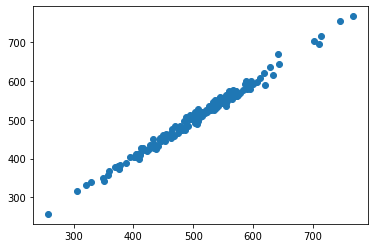

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.scatter(x = y_test_reshape, y= y_predicts)
plt.figure(figsize = (20,20))
plt.show()




### VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error(y_test_reshape, y_predicts )
MSE = metrics.mean_squared_error(y_test_reshape, y_predicts )
RMSE = np.sqrt(MSE)  
r2 = metrics.r2_score(y_test_reshape,y_predicts )


print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.236949056091416
MSE: 80.19544609397684
RMSE: 8.955191013818569
R^2: 0.9889519444377916


### V. What is the limitation of using the Normal equation for regression?

#### Answer:The normal equation computes the inverse of X tranpose X this is a matrix multiplication of (n+1)x (n+1) where n is the number of features in x.  The computational complexity of inverting such matrix is normally O(n ^ 2.4) to O(n^3). As a result for a data set Large Number of features this approach can get very slow.  Doubling the data set will increase computational complexity by a factor of close to 8.  Also this methos does not support out of core support which means for large data sets that we may need to access the data out of core this is not a suitable algorithem

## 6. Batch Gradient Descent

### I. Implement Batch Gradient Descent based on the way we have learned in the class (See sample code form pdf). You can play with eta and n_iterations and should set to reasonable eta and number of iterations so that you can get the thetas close to Normal equation's theta


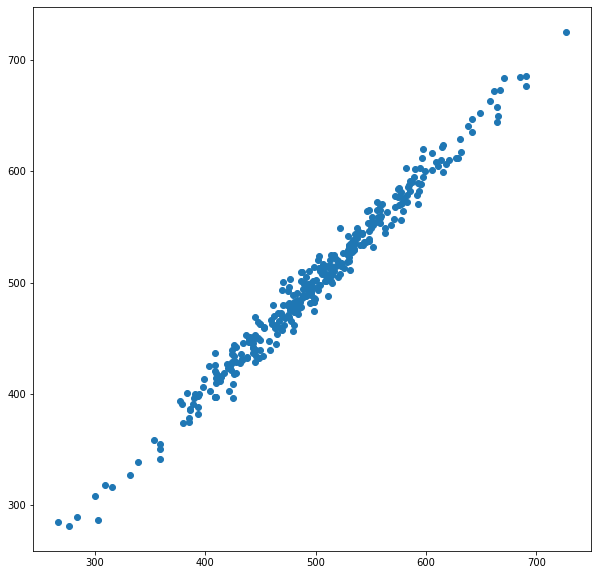

In [ ]:
cost_list = []
epoch_list = []
predicted_list = []

eta = 0.1  # learning rate
n_iterations = 200
m = 350

theta = np.random.randn(4,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_mod.T.dot(X_mod.dot(theta) - y_train_reshape.reshape(350,1))
    theta = theta - eta * gradients
    
    y_predicted = np.dot(theta.T, X_mod.T)
    cost = np.mean(np.square(y_train_reshape.reshape(350, 1) -y_predicted)) # MSE (Mean Squared Error)
        
 
    cost_list.append(cost)
    epoch_list.append(iteration)

plt.figure(figsize=(10,10))
plt.scatter (y_train_reshape.reshape(1,350) ,y_predicted)
plt.show()

### II. Display the theta values. Are they very close to the sklearn's linear regression?

In [ ]:
theta

array([[499.72311649],
       [ 26.04870628],
       [ 36.69255503],
       [ 60.19248611]])

#### Answer: Yes theyare very close.  Values of Sk leran linear were  [499.72311649  26.04870628  36.69255503  60.19248611]


### III. Also plot step number (in x-axis) against the cost(y axis). See an example from this colab link : Link

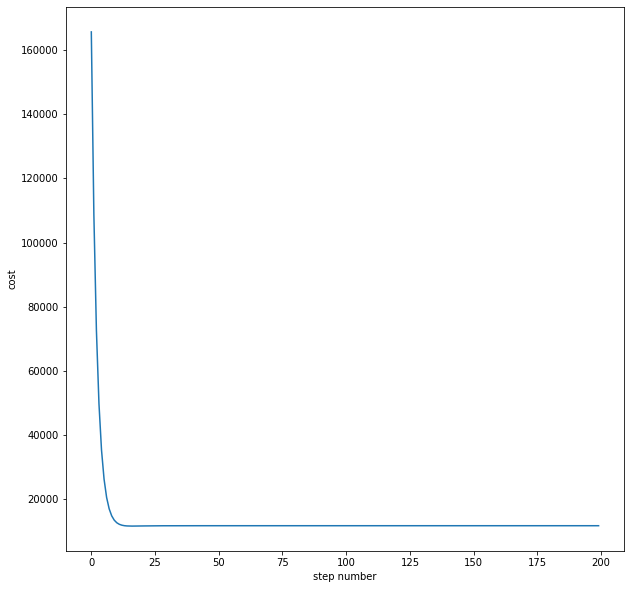

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("step number")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)


    
   

### IV. Perform Prediction for the test set

In [ ]:
y_predictions = X_test_new.dot(theta)

### V. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

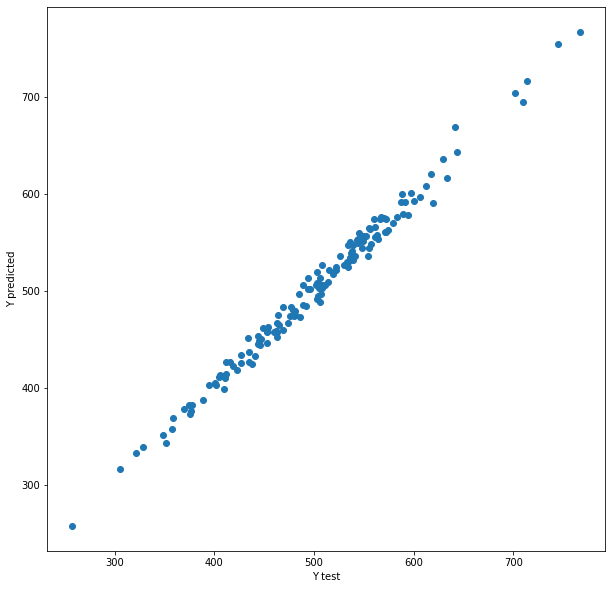

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.scatter(x = y_test_reshape, y = y_predictions)

### VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error( y_test_reshape, y_predictions)
MSE = metrics.mean_squared_error(y_test_reshape, y_predictions)
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test_reshape, y_predictions)



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.236949056091392
MSE: 80.19544609397644
RMSE: 8.955191013818546
R^2: 0.9889519444377916


### VII. Short Question: How do derivatives help in the process of gradient descent?

#### Answer:  derivatives are the slopes of gradient decent.  when calculation the gradients since we go -etha x gradient we are going to the opposit direction gradient increase.  So if gradient is positive means we are getting away from minimum towards up so the value of -etha * gradients is negative so we will decrease next theta.  (bring the weights towards the global min.  If gradient is negative that means we are coming towards the flobal min so -etha * gradient is positive and hence we increaste the thetas 

### VIII. Short Question: What are the benefits and the limitations of using batch gradient descent? 


#### Answer: batch gradient runs over the entire data set so it is in case of very large data sets where there a lot of instances this approch can be lenghthy.   For the same reason Batch gradient cannot accept out of core support becuase it needs the entore data set to perform.  So in instances where data set is contantly updated or too large and needs to be processded out of core this is not a good option.  On the other hand, since batch gradient goes over all the data set, it normally is more accorate and less noisier than Stochastic and mini batch and will reach the global minimum given a correct etha and enough number of iterations

## 7. Stochastic Gradient Descent

### I. Implement Stochastic Gradient Descent and train our data set. You must have to use learning_schedule (see example code in pdf as well as the colab link I have shared in #6 above. The parameters should be reasonable and the theta values should be very close to the normal equation

In [ ]:
cost_list = []
epoch_list = []
m = len(X_mod)
np.random.seed(42)

y_SG = y_train_reshape.reshape(350,1)


n_epochs = 100
t0, t1 = 5, 50 

def learning_schedule(t):
    return t0 / (t + t1)

theta_SGD = np.random.randn(4,1)   

for epoch in range(n_epochs):
    for i in range(m):
       
        random_index = np.random.randint(m)
        xi = X_mod[random_index:random_index+1]
        yi = y_SG[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_SGD) - yi)
        eta = learning_schedule(epoch * m + i)        
        theta_SGD = theta_SGD - eta * gradients
        y_predicted = np.dot(theta_SGD.T, X_mod.T)
        cost = np.mean(np.square(y_SG - y_predicted)) # MSE (Mean Squared Error)
        
        cost_list.append(cost)
        epoch_list.append(epoch)
                   
        
        
   

### II. Display the theta values. Are they very close to the sklearn's linear regression? 

In [ ]:
theta_SGD  

array([[499.58994836],
       [ 26.02618459],
       [ 36.69015877],
       [ 60.12410813]])

#### Answer:Yes they are very close.  Values of Sk leran linear were  [499.72311649  26.04870628  36.69255503  60.19248611]

### III. Also plot step number (in x-axis) against cost(y-axis). See an example from this colab link : Link

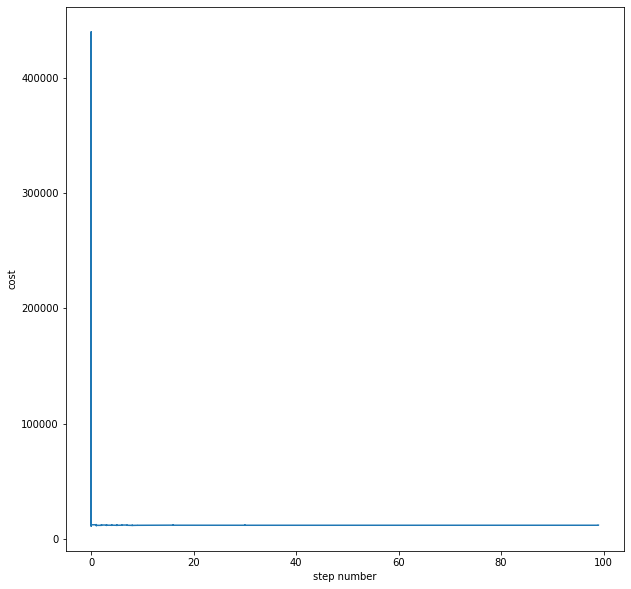

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("step number")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

### IV. Perform Prediction for the test set

In [ ]:
y_SG_predictions = X_test_new.dot(theta_SGD )

### V. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

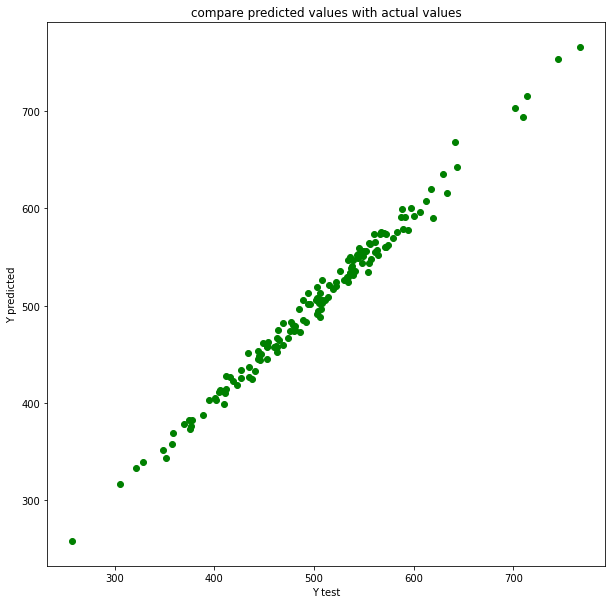

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.title("compare predicted values with actual values")

plt.scatter(y_test_reshape,y_SG_predictions, c="green")
plt.show()

### VI. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)


In [ ]:
MAE = metrics.mean_absolute_error( y_test_reshape, y_SG_predictions)
MSE = metrics.mean_squared_error(y_test_reshape, y_SG_predictions)
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test_reshape, y_SG_predictions)



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.230461559742868
MSE: 80.11446646834624
RMSE: 8.950668492819196
R^2: 0.9889631005251625


### VII. Short Question: What are the benefits and the limitations of using Stochastic gradient descent?

#### Answer: SG uses one randome sample in each epoch instead of using the whole training set. So its much faster.  However since its only using one data at the time, the algorithem is much noisier.  If we do not use a proper etha or num of iterations it might not get to minimum. Also it may bounce around the minimum and never setteling.  We allievate this issue by using a variable learning rate like we did in this example.  So SG is good for very large data sets.  It can also suppot out of core data.

## 8. SGDRegressor from sklearn

### I. Use sklearn's SGDRegressor to train a model for our data set. Put a reasonable iteration and tolerance and learning steps so that we can get coefficients close to normal equation

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-2, penalty=None, eta0=0.01, random_state=101 )
sgd_reg.fit(X_train_scaled, y_SG.ravel())

SGDRegressor(penalty=None, random_state=101, tol=0.01)

### II. Display the theta values. Are they very close to sklearn's linear regression?

In [ ]:
sgd_reg.coef_    

array([26.04598403, 36.6909224 , 60.15824668])

In [ ]:
sgd_reg.intercept_

array([499.74875544])

#### Answer:Yes they are very close.  Values of Sk leran linear were  [499.72311649  26.04870628  36.69255503  60.19248611]

### III.Predict for the test data

In [ ]:
y_sgd_predicts = sgd_reg.predict(X_test_scaled)


### IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

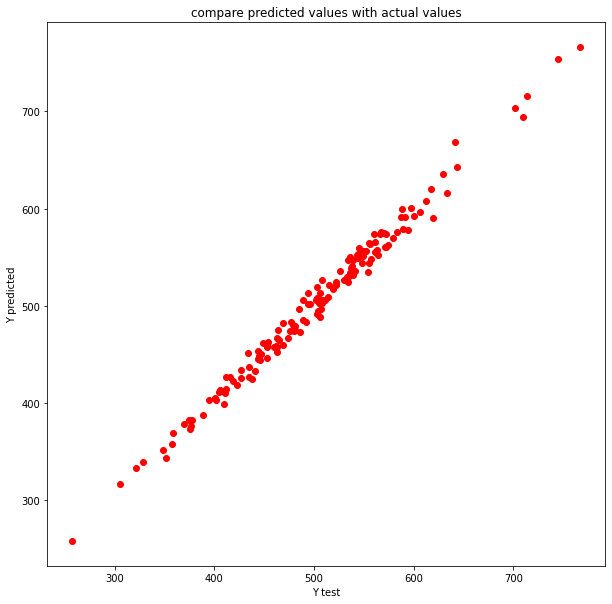

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.title("compare predicted values with actual values")

plt.scatter(y_test,y_sgd_predicts,  c="red")
plt.show()

### V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error( y_test, y_sgd_predicts)
MSE = metrics.mean_squared_error(y_test, y_sgd_predicts)
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test, y_sgd_predicts)



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.2405444545575
MSE: 80.2966229811319
RMSE: 8.960838296785179
R^2: 0.9889380058923336


## 9. Mini-batch Gradient Descent

### I. Briefly explain how mini-batch can overcome the limitations of Batch gradient descent and SGD.

#### Answer: mini batch GD uses a batch of data.  So its not as sensitive to the data set size as gradient decent as it does not go through the entire data set.  But also its not as random and noisy as Stochastic Gradient as it does not only use one data.  So its a good in between solution. Performs well with larger data set and more accurate than Stichastic

## 10. Polynomial of degree 2

### I. Use sklearn's Polynomial features to degree = 2 on our training and test set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_Train_poly = poly_features.fit_transform(X_train_scaled)
X_Test_poly = poly_features.fit_transform(X_test_scaled)


X_Train_poly[0]

array([-1.49994106, -0.7308338 ,  0.27443007,  2.24982319,  1.09620763,
       -0.41162892,  0.53411804, -0.20056277,  0.07531186])

In [ ]:
X_train_scaled[0]

array([-1.49994106, -0.7308338 ,  0.27443007])

## II. Use linearRegression on the new polynomial features

In [ ]:
lreg = LinearRegression()
lreg.fit(X_Train_poly, y_train)


LinearRegression()

### III. Predict for test set

In [ ]:
y_poly_predict = lreg.predict(X_Test_poly)

### IV. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

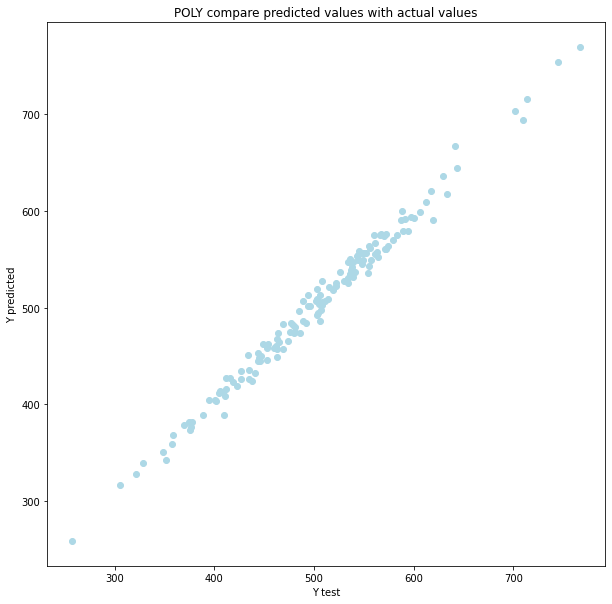

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.title("POLY compare predicted values with actual values")

plt.scatter(y_test,y_poly_predict,  c="lightblue")
plt.show()

### V. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error( y_test,y_poly_predict )
MSE = metrics.mean_squared_error(y_test, y_poly_predict )
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test, y_poly_predict )



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.3789032300486
MSE: 83.56961053943148
RMSE: 9.141641566996132
R^2: 0.9884871056210621


## 12. Learning Curve

### I. Generate learning curve with linearRegression

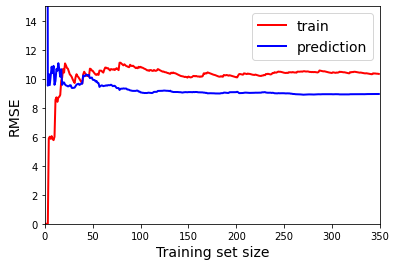

In [ ]:
train_errors, val_errors = [], []
for m in range(1, len(X_train) + 1):
    lr.fit(X_train_scaled[:m], y_train[:m])
    y_train_predict = lr.predict(X_train_scaled[:m])
    y_val_predict = lr.predict(X_test_scaled)
    train_errors.append(metrics.mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(metrics.mean_squared_error(y_test, y_val_predict))
    

plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="prediction")
    
plt.legend(loc="upper right", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14)              
    

plt.axis([0, 350, 0, 15])                        

plt.show()   

### II. Generate learning curve with polynomial regression with degree  = 5

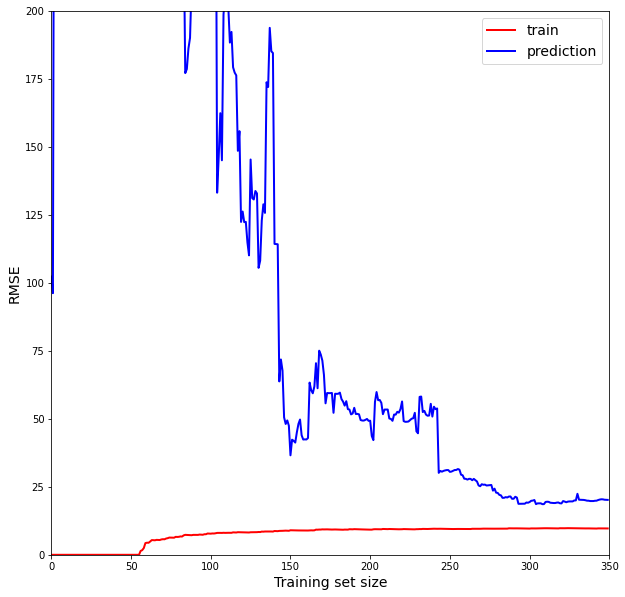

In [ ]:
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

train_errors, val_errors = [], []
for m in range(1, len(X_train) + 1):
    poly_reg.fit(X_train_scaled[:m], y_train[:m])
    y_train_predict = poly_reg.predict(X_train_scaled[:m])
    y_val_predict = poly_reg.predict(X_test_scaled)
    train_errors.append(metrics.mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(metrics.mean_squared_error(y_test, y_val_predict))
    
plt.figure (figsize = (10,10))
plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="prediction")
    
plt.legend(loc="upper right", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14)              
    

plt.axis([0, 350, 0, 200])                        

plt.show()                     

### III. Interpret the result

#### Answer: Doing a poly degree 5 severly overfits the data.   The error for training set is minimal which means the model is predicting very well for traning set but when it comes to unseens data (aka test set) the error increases drastically.  This shows our model has over fitted to training set and making bad prediction for test set.  For linear the model is trained on very few training instances, it is not generalizing good so the error is initially  big. Then as the model is is fed more data it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.  This learning curve is typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high


## 13. Regularization

## I. Explain the purpose of regularization

#### Answer: Constraining a model to make it simpler and reduce the risk of overfitting is called regularization. The fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.  In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients ϴj

## 14. Ridge Regression

### I. Use sklearn's Ridge to train the data set (use the polynomial degree 3 data set)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures (degree = 3, include_bias = False )
X_Train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.fit_transform(X_test_scaled)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, solver="cholesky", random_state = 101 )
ridge.fit(X_train_scaled, y_train)




Ridge(alpha=1, random_state=101, solver='cholesky')

### II. Predict for test set

In [ ]:
y_ridge_predicts = ridge.predict(X_test_scaled)

### III. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

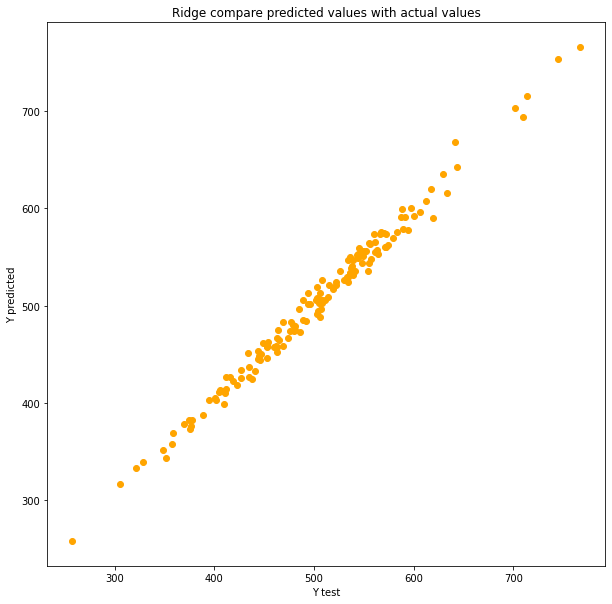

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.title("Ridge compare predicted values with actual values")

plt.scatter(y_test,y_ridge_predicts,  c="orange")
plt.show()

### IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error( y_test,y_ridge_predicts )
MSE = metrics.mean_squared_error(y_test, y_ridge_predicts)
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test, y_ridge_predicts )



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.254026252840113
MSE: 80.54034146556432
RMSE: 8.974427082859625
R^2: 0.9889044302282692


## 15. SGDRegressor  for Ridge

### I. Use sklearn's SGDRegressor for Ridge Regression

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=101)
sgd_reg.fit(X_train_scaled, y_train.ravel())

SGDRegressor(random_state=101)

### II.  Predict for test set

In [ ]:
y_SGD_predicts = sgd_reg.predict(X_test_scaled)

### III. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

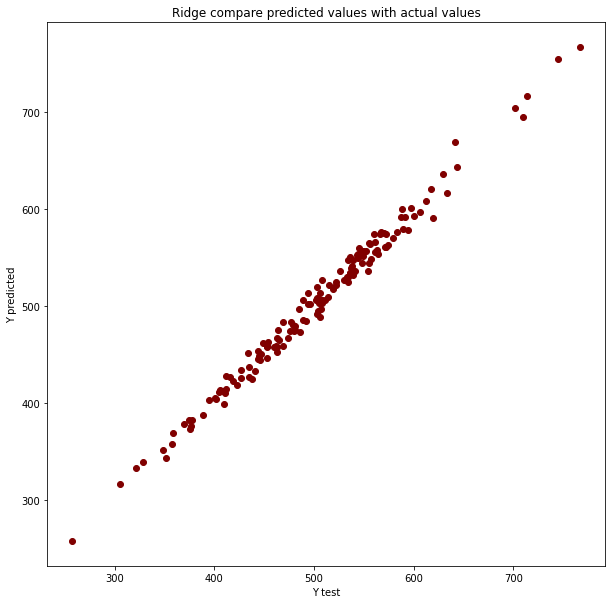

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.title("Ridge compare predicted values with actual values")

plt.scatter(y_test,y_SGD_predicts,  c="maroon")
plt.show()

### IV.  Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error( y_test,y_SGD_predicts)
MSE = metrics.mean_squared_error(y_test,y_SGD_predicts)
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test,y_SGD_predicts)



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.234830875034277
MSE: 80.12058213806034
RMSE: 8.951010118308455
R^2: 0.9889622580052677


## 16. Lasso Regression

### I. Use sklearn's Lasso

In [ ]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1)
lassoReg.fit(X_train_scaled, y_train )



Lasso(alpha=0.1)

### II. Predict for test set

In [ ]:
y_lasso_predicts = lassoReg.predict(X_test_scaled)

### III. Generate a scatter plot that shows the Y test on the x-axis and y predicted in the y-axis

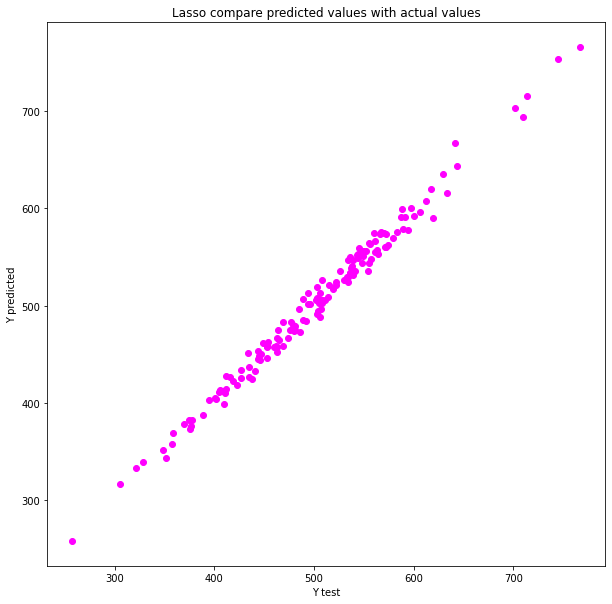

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.title("Lasso compare predicted values with actual values")

plt.scatter(y_test,y_lasso_predicts,  c="magenta")
plt.show()

### IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE, and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error( y_test,y_lasso_predicts)
MSE = metrics.mean_squared_error(y_test,y_lasso_predicts)
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test,y_lasso_predicts)



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 7.24167546047247
MSE: 80.34038281856711
RMSE: 8.96327969097066
R^2: 0.9889319773565635


### V.  How Lasso perform the regularization and how does that affect the thetas?

#### Answer: Least Absolute Shrinkage and Selection Operator Regression ( called Lasso Regression) is another regularized version of Linear Regression. It adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.  An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important  features. automatically performs feature selection and outputs a sparse model.

## 17.  Elastic Net

### I. Use sklearn's ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 0.1, l1_ratio=0.5, random_state = 101 )
elastic.fit(X_train_scaled, y_train)



ElasticNet(alpha=0.1, random_state=101)

### II.  Predict for test set

In [ ]:
y_elastic_predicts = elastic.predict(X_test_scaled)


### III.  Generate a scatter plot that shows the Y test in x axis and y predicted in y axis

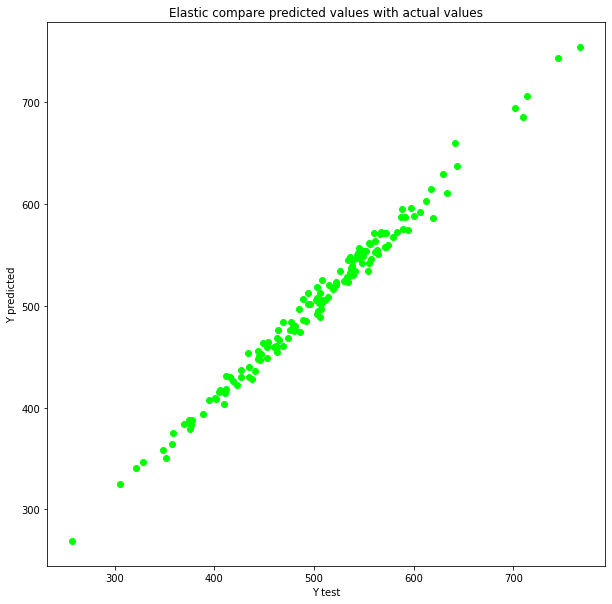

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("Y test")
plt.ylabel("Y predicted")
plt.title("Elastic compare predicted values with actual values")

plt.scatter(y_test,y_elastic_predicts,  c="lime")
plt.show()

### IV. Use sklearn's metrics to print the value of MAE, MSE, RMSE and R^2  (see documentation of sklearn's metrics)

In [ ]:
MAE = metrics.mean_absolute_error( y_test,y_elastic_predicts)
MSE = metrics.mean_squared_error(y_test,y_elastic_predicts)
RMSE = np.sqrt(MSE)
r2=metrics.r2_score(y_test,y_elastic_predicts)



print("MAE:",MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R^2:", r2)

MAE: 8.187387906269285
MSE: 101.35877202364965
RMSE: 10.067709373221382
R^2: 0.9860363973320599


### V. How ElasticNet different compared to Lasso and RIDGE perform the regularization and how does that affect the thetas?

#### Answer: Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms.   Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

## 18. Bonus Question:

### In most of the above cases, for example, LinearRegression of sklearn, (Q4 above), we have used scaled data set for training. However, in a real-life scenario, you would like to predict the yearly amount spent for a new instance. The real data will not be scaled. How would you use the model for this case to predict this instance? [35.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961] = ? Write necessary code so that it will predict a reasonable value for the amount spent. This is very close to our first training record.

In [ ]:
new_x = np.array([[35.49726772511229,12.655651149166752,39.57766801952616,4.082620632952961]])
new_x = np.delete(new_x , [2])
new_x_scaled = scaler.transform(new_x.reshape(1,-1))
new_x_mod= np.append(1,new_x_scaled)
new_x_mod

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([ 1.        ,  1.46460245, -0.39873051,  0.04171346])

In [ ]:
predict_value=new_x_mod.dot(best_theta)
predict_value


525.7545111487744